## 依照老師要求，把全部epoch改成2並輸出，於課堂上完成

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11501568/11490434 [==============================] - 0s 0us/step


**Training the same model on MNIST data with noise channels or all-zero channels**

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 3s 7ms/step - loss: 0.6002 - accuracy: 0.8174 - val_loss: 0.3420 - val_accuracy: 0.8869
Epoch 2/2
375/375 [==============================] - 2s 6ms/step - loss: 0.2473 - accuracy: 0.9230 - val_loss: 0.2015 - val_accuracy: 0.9343
Epoch 1/2
375/375 [==============================] - 3s 6ms/step - loss: 0.2861 - accuracy: 0.9166 - val_loss: 0.1456 - val_accuracy: 0.9588
Epoch 2/2
375/375 [==============================] - 2s 6ms/step - loss: 0.1194 - accuracy: 0.9649 - val_loss: 0.1079 - val_accuracy: 0.9668


**Plotting a validation accuracy comparison**

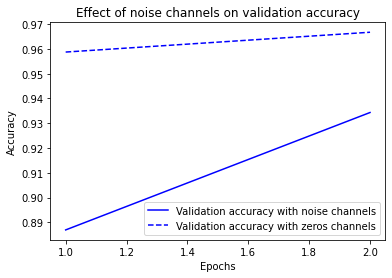

In [7]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 3)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [9]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=2,
          batch_size=128,
          validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 2s 4ms/step - loss: 2.3170 - accuracy: 0.1024 - val_loss: 2.3077 - val_accuracy: 0.1013
Epoch 2/2
375/375 [==============================] - 2s 4ms/step - loss: 2.2991 - accuracy: 0.1170 - val_loss: 2.3148 - val_accuracy: 0.0983


#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [10]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=2,
          batch_size=128,
          validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 2s 4ms/step - loss: 633.4927 - accuracy: 0.4066 - val_loss: 2.1047 - val_accuracy: 0.2482
Epoch 2/2
375/375 [==============================] - 2s 4ms/step - loss: 4.6557 - accuracy: 0.2735 - val_loss: 7.1849 - val_accuracy: 0.3414


**The same model with a more appropriate learning rate**

In [11]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=2,
          batch_size=128,
          validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 2s 4ms/step - loss: 0.3386 - accuracy: 0.9124 - val_loss: 0.1537 - val_accuracy: 0.9582
Epoch 2/2
375/375 [==============================] - 2s 4ms/step - loss: 0.1480 - accuracy: 0.9628 - val_loss: 0.1360 - val_accuracy: 0.9709


### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [12]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 1s 1ms/step - loss: 0.6596 - accuracy: 0.8374 - val_loss: 0.3594 - val_accuracy: 0.9032
Epoch 2/2
375/375 [==============================] - 0s 806us/step - loss: 0.3513 - accuracy: 0.9033 - val_loss: 0.3084 - val_accuracy: 0.9147


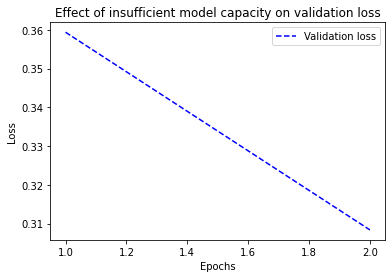

In [13]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 3)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [14]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 1s 2ms/step - loss: 0.3641 - accuracy: 0.8959 - val_loss: 0.1876 - val_accuracy: 0.9440
Epoch 2/2
375/375 [==============================] - 1s 2ms/step - loss: 0.1584 - accuracy: 0.9533 - val_loss: 0.1354 - val_accuracy: 0.9598


## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [15]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=2, batch_size=512, validation_split=0.4)

17473536/17464789 [==============================] - 0s 0us/step
Epoch 1/2
30/30 [==============================] - 1s 22ms/step - loss: 0.5045 - accuracy: 0.7941 - val_loss: 0.4002 - val_accuracy: 0.8417
Epoch 2/2
30/30 [==============================] - 0s 10ms/step - loss: 0.2990 - accuracy: 0.9031 - val_loss: 0.3000 - val_accuracy: 0.8924


**Version of the model with lower capacity**

In [16]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 1s 20ms/step - loss: 0.6368 - accuracy: 0.7407 - val_loss: 0.5787 - val_accuracy: 0.8408
Epoch 2/2
30/30 [==============================] - 0s 11ms/step - loss: 0.5308 - accuracy: 0.8677 - val_loss: 0.4966 - val_accuracy: 0.8645


**Version of the model with higher capacity**

In [17]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 2s 62ms/step - loss: 0.5488 - accuracy: 0.7733 - val_loss: 0.3477 - val_accuracy: 0.8574
Epoch 2/2
30/30 [==============================] - 2s 51ms/step - loss: 0.2621 - accuracy: 0.8958 - val_loss: 0.3504 - val_accuracy: 0.8589


#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [18]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 1s 25ms/step - loss: 0.5804 - accuracy: 0.7791 - val_loss: 0.4728 - val_accuracy: 0.8400
Epoch 2/2
30/30 [==============================] - 0s 11ms/step - loss: 0.3825 - accuracy: 0.8963 - val_loss: 0.4128 - val_accuracy: 0.8638


**Different weight regularizers available in Keras**

In [19]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [20]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 1s 17ms/step - loss: 0.6426 - accuracy: 0.6100 - val_loss: 0.5669 - val_accuracy: 0.8283
Epoch 2/2
30/30 [==============================] - 0s 11ms/step - loss: 0.5504 - accuracy: 0.7394 - val_loss: 0.4844 - val_accuracy: 0.8671


## Summary